In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [5]:
df = pd.read_excel(r'E:\pythonziliao\dataset\bjlianjia.xlsx', 0, header=None)

In [18]:
columns = ['房型', '成交时间', '地址', '价格', '朝向', '装修','建造年代', '楼层', '产权', '面积', '得房面积', '是都有钥匙', '编号']
df.columns = columns

In [19]:
df.head()

,房型,成交时间,地址,价格,朝向,装修,建造年代,楼层,产权,面积,得房面积,是都有钥匙,编号
0,3室1厅1厨1卫,2016.08.30 链家成交,人定湖北巷,750.0,东南 北,简装,1984,中楼层 (共6层),70年,77.5㎡,暂无数据,无,101100406614
1,2室1厅1厨1卫,2016.07.31 链家成交,刘家窑东里,343.0,南 西,精装,1998,高楼层 (共18层),70年,75㎡,暂无数据,有,101091748516
2,3室1厅1厨1卫,2017.02.17 链家成交,兰园,640.0,南 北,简装,1998,中楼层 (共6层),70年,88.1㎡,暂无数据,无,101101151051
3,2室1厅1厨1卫,2017.02 其他公司成交,科育小区,NaN,南 北,精装,1975,顶层 (共4层),70年,66.69㎡,50.03㎡,无,101100278245
4,3室1厅1厨1卫,2016.09.15 链家成交,中纺宿舍,925.0,东南,简装,未知,低楼层 (共18层),70年,108.86㎡,暂无数据,有,101100449527


## 数据处理

In [8]:
df.dtypes

房型        object
交易时间      object
地址        object
价格       float64
朝向        object
装修        object
建造年代      object
楼层        object
产权        object
面积        object
得房面积      object
是都有钥匙     object
编号        object
dtype: object

In [9]:
df['房型'].value_counts()

2室1厅1厨1卫            49812
1室1厅1厨1卫            26057
- -室- -厅            18216
3室1厅1厨1卫            13088
3室2厅1厨2卫            10018
2室2厅1厨1卫             6604
1室0厅1厨1卫             4786
2室2厅1厨2卫             3140
3室1厅1厨2卫             2467
4室2厅1厨2卫             1784
3室2厅1厨1卫             1698
2室1厅1厨2卫             1645
2室0厅1厨1卫             1060
4室2厅1厨3卫              772
1室0厅0厨0卫              718
1室2厅1厨1卫              639
3室0厅1厨1卫              615
3室2厅1厨3卫              585
1室0厅0厨1卫              281
4室1厅1厨2卫              275
4室1厅1厨1卫              271
车位                    214
5室2厅1厨2卫              128
1室1厅1厨2卫              128
5室2厅1厨3卫              121
1室1厅0厨1卫              114
4室2厅1厨4卫              110
3室2厅2厨2卫              101
4室3厅1厨3卫               76
1室2厅1厨2卫               62
                    ...  
4室1厅2厨1卫                1
6室3厅2厨5卫                1
7室1厅1厨1卫                1
3室0厅2厨1卫                1
5室3厅2厨2卫                1
8室1厅1厨2卫                1
4室2厅2厨6卫                1
4室1厅3厨1卫    

In [12]:
#房型数据清洗
def _parseHouse(s):
    try:
        s = s.strip()
        r = []
        if len(s) == 8:
            r.append(s[0])
            r.append(s[2])
            r.append(s[4])
            r.append(s[6])
        else:
            r = [-1, -1, -1, -1]
    except:
        r = [-1, -1, -1, -1]
    return r

room_df = pd.DataFrame(df['房型'].apply(lambda s: _parseHouse(s)).values.tolist(), columns = ['室', '厅', '厨', '卫'])
room_df.replace({'-': -1}, inplace=True)

In [13]:
room_df

,室,厅,厨,卫
0,3,1,1,1
1,2,1,1,1
2,3,1,1,1
3,2,1,1,1
4,3,1,1,1
5,2,1,1,1
6,2,1,1,1
7,3,1,1,1
8,3,1,1,1
9,2,1,1,1


In [14]:
#朝向处理
def _parseCX(s):
    try:
        s = s.strip()
        return s.split(" ")
    except :
        return ['unknown']
cx_data = df['朝向'].apply(lambda s : _parseCX(s)).values.tolist()

In [20]:
#成交时间处理
df['成交时间'][:5]

0    2016.08.30 链家成交
1    2016.07.31 链家成交
2    2017.02.17 链家成交
3     2017.02 其他公司成交
4    2016.09.15 链家成交
Name: 成交时间, dtype: object

In [61]:
import re
def _parseDate(s):
    try :
        p = re.compile("[\d\.]+")
        return p.findall(s)[0]
    except :
        return '-1. -1. -1'

date_df =df['成交时间'].apply(lambda s: _parseDate(s))

date_df = pd.DataFrame(date_df.apply(lambda s: s.split(".")).values.tolist(), columns = ['年', '月', '日'])

date_df.fillna(-1, inplace = True)

In [62]:
#面积与产权处理
def _parseArea(s):
    try:
        p = re.compile("[\d\.]+")
        return p.findall(s)[0]
    except:
        return -1
    
df['面积'].apply(lambda s: _parseArea(s))
df['产权'].apply(lambda s: _parseArea(s))

0         70
1         70
2         70
3         70
4         70
5         70
6         70
7         70
8         70
9         70
10        70
11        70
12        70
13        70
14        70
15        70
16        70
17        70
18        70
19        50
20        70
21        70
22        70
23        70
24        70
25        70
26        70
27        70
28        70
29        70
          ..
147140    70
147141    70
147142    70
147143    70
147144    70
147145    70
147146    70
147147    70
147148    70
147149    70
147150    70
147151    70
147152    70
147153    70
147154    70
147155    70
147156    70
147157    70
147158    70
147159    70
147160    70
147161    70
147162    70
147163    70
147164    70
147165    70
147166    70
147167    70
147168    70
147169    70
Name: 产权, Length: 147170, dtype: object

Populating the interactive namespace from numpy and matplotlib


E:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


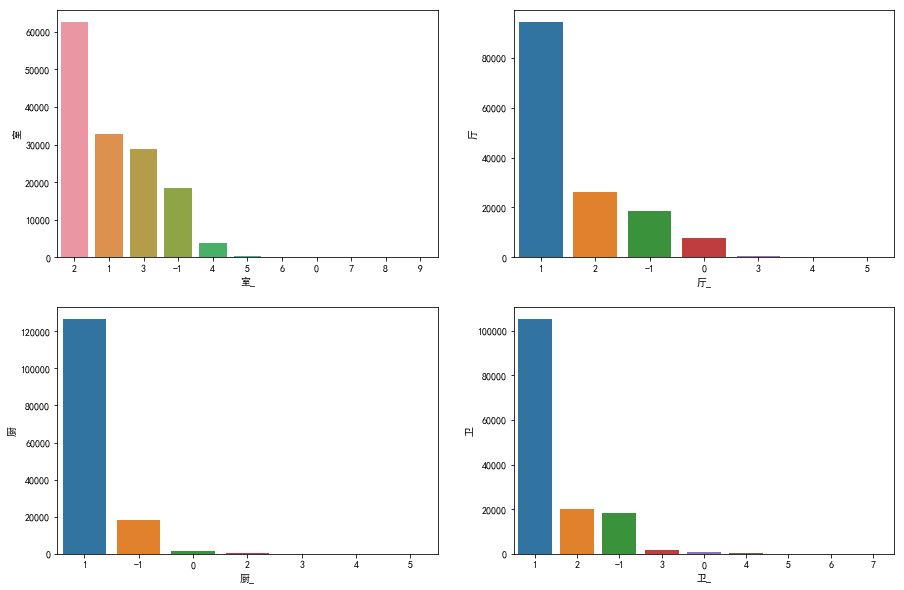

In [32]:
#房型探索

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

#遍历的方式

for ax, col in zip(axes.flatten(), room_df.columns):
    temp = room_df[col].value_counts().reset_index().rename(columns={'index':col+"_"})
    sns.barplot(x=col+"_", y=col, data=temp, ax = ax)
    

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


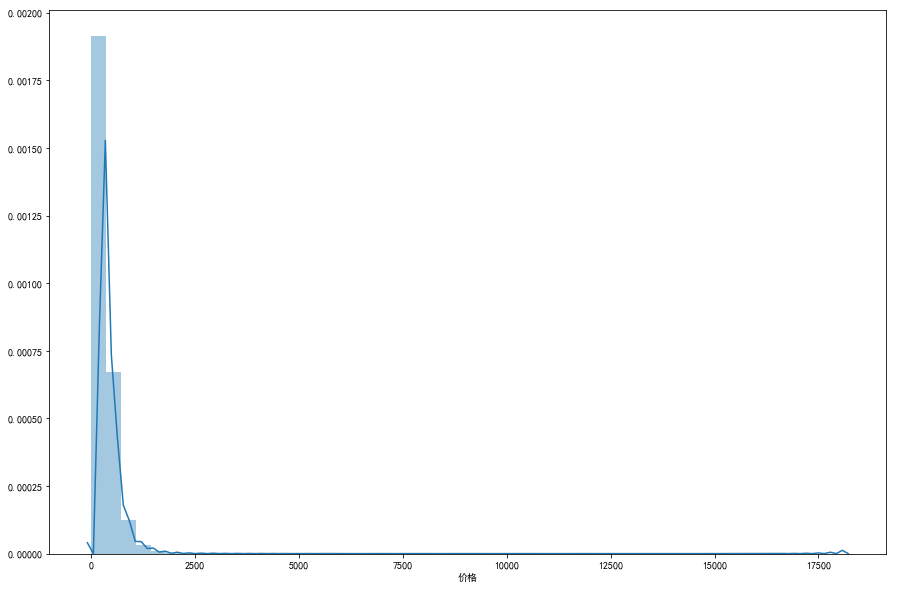

In [33]:
#成交价格的集中趋势
sns.distplot(df['价格'].fillna(0))

([<matplotlib.axis.XTick at 0xed84230>,
 <a list of 29 Text xticklabel objects>)

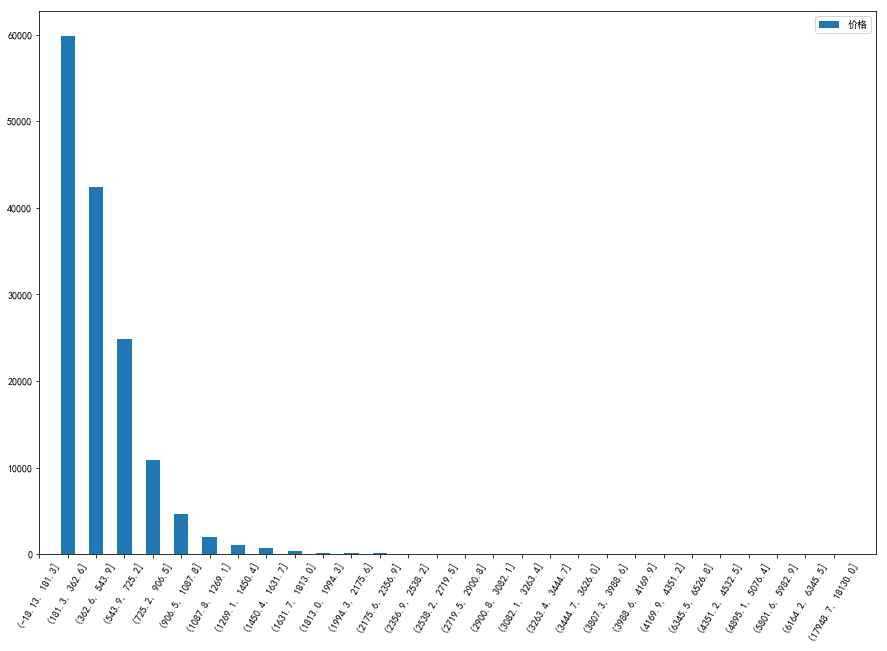

In [35]:
#对连续特征离散化， 更直观查看分布
cut_price = pd.cut(df['价格'].fillna(0), bins = 100).value_counts()
cut_price = pd.DataFrame(cut_price[cut_price>0]).reset_index()
cut_price.plot.bar()
plt.xticks(range(-1,28), cut_price['index'].values, rotation=60)

In [36]:
cut_price

,index,价格
0,"(-18.13, 181.3]",59792
1,"(181.3, 362.6]",42357
2,"(362.6, 543.9]",24900
3,"(543.9, 725.2]",10855
4,"(725.2, 906.5]",4606
5,"(906.5, 1087.8]",2024
6,"(1087.8, 1269.1]",1059
7,"(1269.1, 1450.4]",677
8,"(1450.4, 1631.7]",357
9,"(1631.7, 1813.0]",186


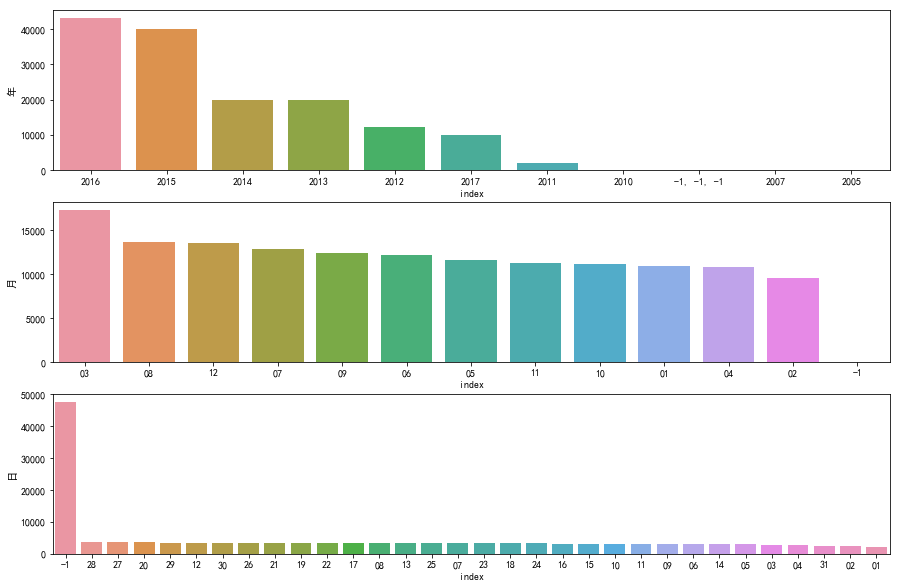

In [43]:
#成交时间趋势
fig, axs = subplots(ncols = 1, nrows = 3)

for i, col in enumerate(date_df.columns):
    temp_data = date_df[col].value_counts().reset_index()
    sns.barplot(x='index', y=col, data=temp_data, ax=axs[i])

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


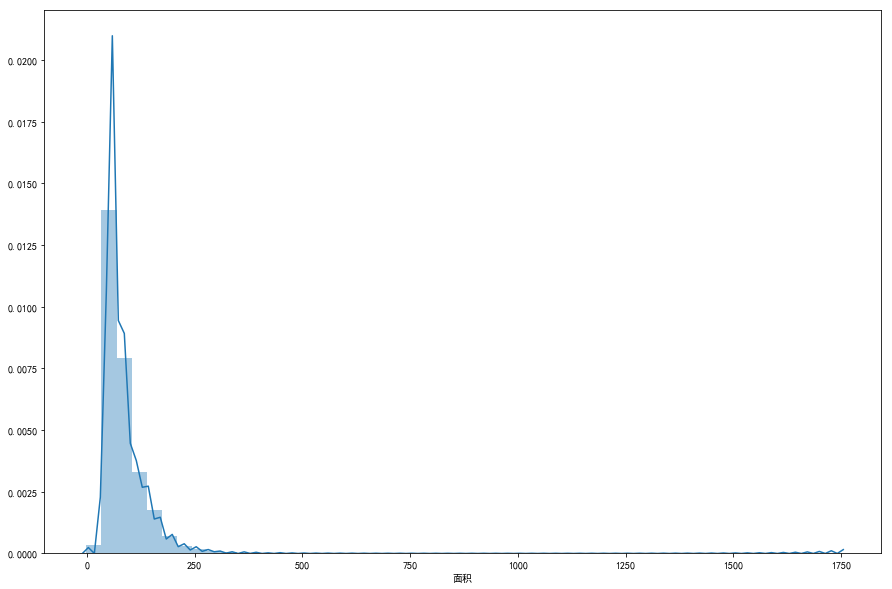

In [46]:
#房屋面积
sns.distplot(df['面积'].apply(lambda s :_parseArea(s)).astype('float16'))

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


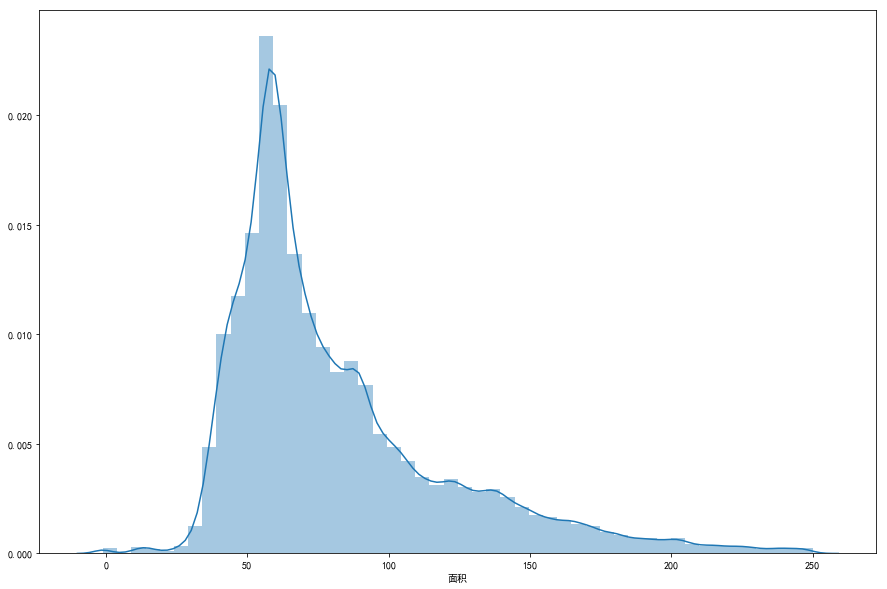

In [55]:
area = df['面积'].apply(lambda s:_parseArea(s)).astype('float16')
area = area[area<=250]
sns.distplot(area, bins = 50)

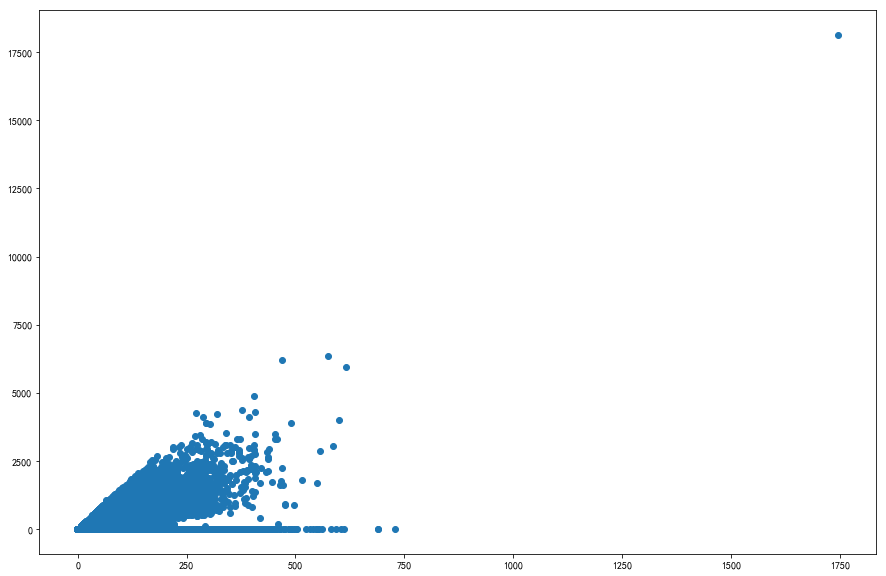

In [56]:
#价格与面积的关系
plt.scatter(df['面积'].apply(lambda s: _parseArea(s)).astype('float16').values, df['价格'].fillna(0).values)

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


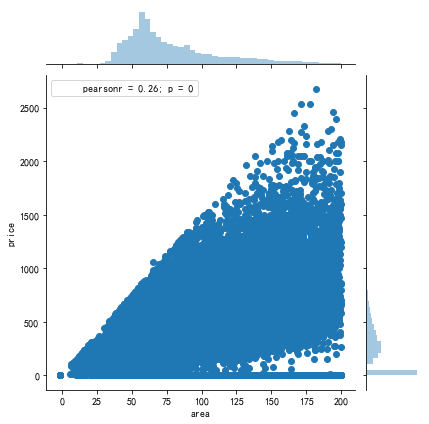

In [58]:
area_price = pd.DataFrame(list(zip(df['面积'].apply(lambda s: _parseArea(s)).astype('float16').values, 
                                   df['价格'].fillna(0).values)), columns = ['area', 'price'])

area_price = area_price.loc[area_price['area']<= 200]
sns.jointplot(x = 'area', y = 'price', data = area_price)

(array([  9.41000000e+02,   3.24800000e+03,   6.03500000e+03,
          1.57940000e+04,   1.43290000e+04,   1.44610000e+04,
          1.07580000e+04,   1.37620000e+04,   7.09500000e+03,
          7.57500000e+03,   8.02500000e+03,   1.14080000e+04,
          6.68000000e+03,   6.01500000e+03,   4.76400000e+03,
          5.54900000e+03,   1.47400000e+03,   6.69000000e+02,
          5.30000000e+02,   2.01000000e+02,   2.49000000e+02,
          2.08000000e+02,   3.44000000e+02,   1.44000000e+02,
          2.24000000e+02,   2.31000000e+02,   2.16000000e+02,
          5.50000000e+01,   1.40000000e+01,   1.00000000e+01]),
 array([  0.        ,   2.26666667,   4.53333333,   6.8       ,
          9.06666667,  11.33333333,  13.6       ,  15.86666667,
         18.13333333,  20.4       ,  22.66666667,  24.93333333,
         27.2       ,  29.46666667,  31.73333333,  34.        ,
         36.26666667,  38.53333333,  40.8       ,  43.06666667,
         45.33333333,  47.6       ,  49.86666667,  52.1333

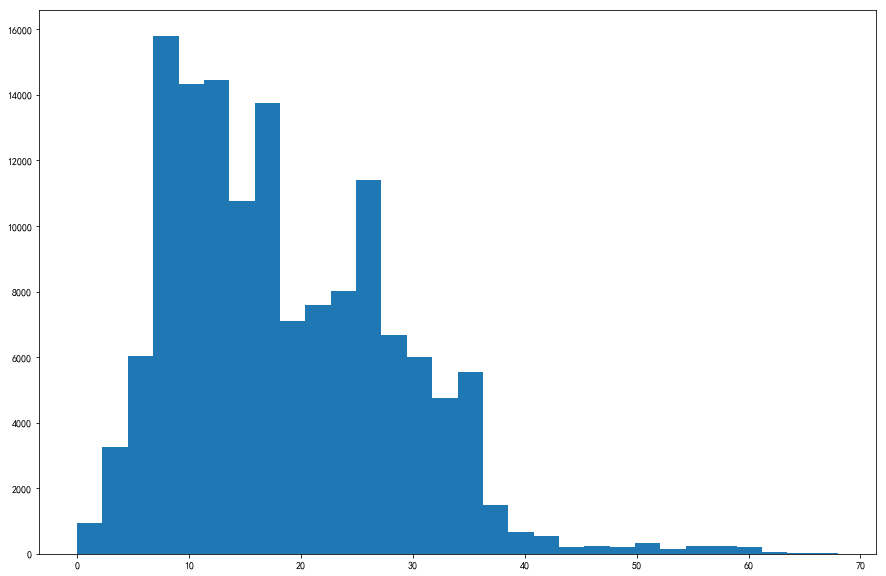

In [63]:
diff_year = date_df['年'].astype('int16') - df['建造年代'].apply(lambda s: str(s).strip()).replace({'未知':-1}).fillna(-1).astype('float16')
diff_year = diff_year[(diff_year >= 0) &(diff_year < 70)]
plt.hist(diff_year.values, bins=30)